In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.cluster import KMeans
import umap




c:\Users\vyago\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
#INPUT
input = 'HT001-FE002'
fe = input.split("-")[1]
#EXPERIMENTO
experimento = 'FE-003'

#CARGO DATASETS
os.chdir("C:/Users/vyago/Desktop/Yago/Competencia/ypf")  # Directorio actual
train = pd.read_csv(f"../Exp/{fe}/train.csv")

In [27]:
train = train.select_dtypes("number")
train["evento"] = train["delta_WHP"].apply( lambda x: 1 if x!=0 else 0)  # Genero feature evento de interferencia
X_train = train[train.columns.drop(["delta_WHP"])]


In [36]:

kmeans = KMeans(n_clusters=2, random_state=42).fit(X_train)
kmeans.labels_




array([0, 0, 0, ..., 0, 0, 0])

In [37]:
train["kmeans"] = kmeans.labels_

In [38]:
train["kmeans"].value_counts()

0    26148
1       30
Name: kmeans, dtype: int64

TypeError: float() argument must be a string or a real number, not 'KMeans'

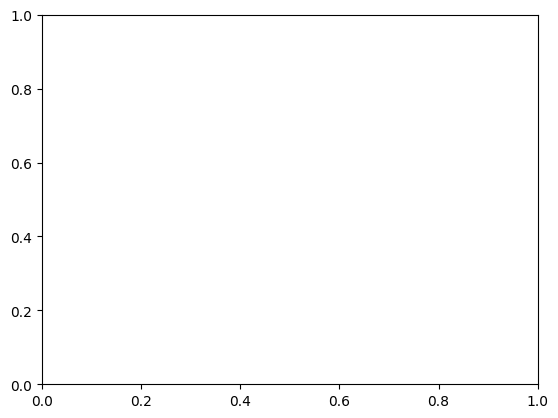

In [21]:
standard_embedding = umap.UMAP(random_state=42).fit_transform(X_train)



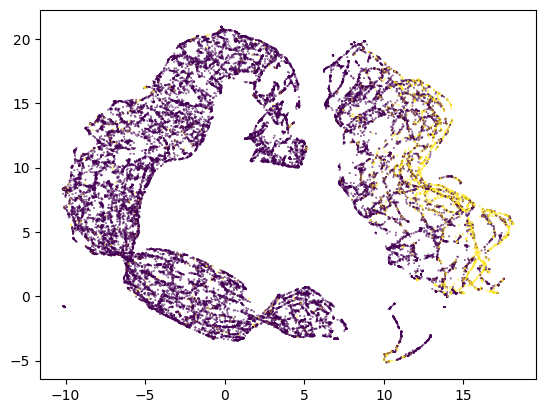

In [29]:
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c=train["evento"].to_numpy(), s=0.1)


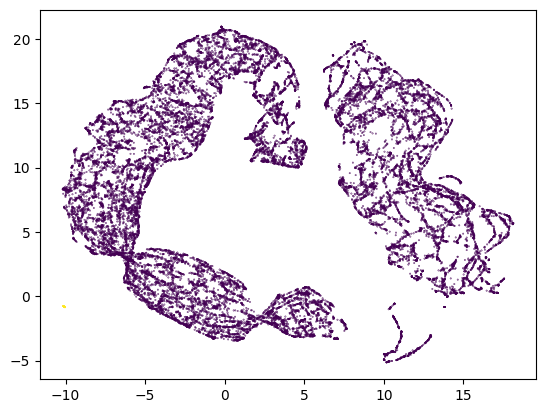

In [39]:
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c=kmeans.labels_, s=0.1)
